## Curso de introdução ao NLP: Análise de Sentimentos

In [1]:
import pandas as pd

In [2]:
# Importação dos dados:

resenha = pd.read_csv('/home/silsantos/Documentos/GitHub/Cursos_Alura/Exercicios/data/imdb-reviews-pt-br.csv')
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# Divisão entre dados de treino e dados de teste:

treino, teste, y_treino, y_teste = train_test_split(resenha['text_pt'], resenha['sentiment'], random_state = 42)

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
# Criando o modelo:

regressao_logistica = LogisticRegression()

### O modelo NÃO interpreta dados textuais.

### É necessário, portanto, "interpretar" os textos para o computador. 

### Se tentarmos treinar o modelo estabelecido acima, resultará em um erro (vide comentário acima)

In [7]:
# Verificando a quantidade de resenhas positivas e negativas:

resenha['sentiment'].value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

### Note que é uma quantidade balanceada. Podemos prosseguir.

In [8]:
# Imprimindo um exemplo de resenha negativa: 
# Notar que as resenhas negativas estão na parte de cima enquanto que as positivas, na parte de baixo do dataframe.

print(resenha['text_pt'][189])

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [9]:
# Imprimindo um exemplo de resenha positiva: 
# Notar que as resenhas negativas estão na parte de cima enquanto que as positivas, na parte de baixo do dataframe.

print(resenha['text_pt'][49002])

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maior que você 

In [10]:
# Criação de uma coluna chamada 'Classificação', onde as resenhas serão classificadas em 0 ou 1 (0: negativas, 1: positivas):

resenha['classificacao'] = resenha['sentiment'].replace(['neg','pos'], [0,1])
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


### Dados Rotulados - Nossos dados possuem um rótulo: positivo ou negativo.

> Nesse caso, são usados algoritmos de machine learning SUPERVISIONADOS. Esses algoritmos têmm como supervisores os rótulos, que norteiam o aprendizado da máquina.

#### Dados não rotulados - São aqueles que não têm rótulos.

> Nesse caso, são usados algoritmos de machine learning não supervisionados.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
# Exemplo:

texto = ['Assisti um filme ótimo', 'Assisti um filme ruim']

In [13]:
# Transformando um texto em um vetor:

vetorizar = CountVectorizer(lowercase = False)

bag_of_words = vetorizar.fit_transform(texto)
bag_of_words

# Note que o formato da bag_of_words é uma matriz 2x5

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [14]:
# Identificando as features:

vetorizar.get_feature_names()

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

### NOTA:

#### Nas frases originais, existem palavras escritas com letras maiúsculas. Na lista de palavras acima, todas se encontraríam em letras minúsculas, por definição padrão. Esse parâmetro foi ajustado (lowercase = False)

***

### NOTA 2:

#### Uma matriz esparsa é uma matriz com muitos zeros. Geralmente não vale a pena criar dataframes com elas, justamente por ocuparmos espaço de memória com zeros.

#### O Pandas não reconhece, no momento da criação de um dataframe, as matrizes esparsas. Por esse motivo, o dataframe não será criado da maneira convencional. Veja abaixo:

In [15]:
# Criando um dataframe da variável bag_of_words:

matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())
matriz_esparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [16]:
# Vetorizando, agora, todas as informações da coluna text_pt:

vetorizar = CountVectorizer(lowercase = False, max_features = 50)

bag_of_words = vetorizar.fit_transform(resenha['text_pt'])
print(bag_of_words.shape) # Na primeira versão, não utilizamos o parâmetro 'max_features', por isso tivemos uma quantidade grande de dimensões - mais de 150mil

(49459, 50)


### NOTA 1:

#### Temos cada resenha foi representada por um vetor de 156923 dimensões. São muitas dimensões e isso custa caro em tempo de processamento e armazenamento. 

#### Parâmetro max_features: podemos definir o tamanho do vetor (dimensões) e as palavras que aparecerão nessas dimensões são aquelas que mais aparecerem.

#### Agora sim podemos treinar o modelo.

In [17]:
# Montando novamente o modelo:

treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              resenha['classificacao'],
                                                              random_state = 42)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print(acuracia)

0.6583097452486858


In [18]:
# Criando uma função que vetorize o texto, crie e treine o modelo:

def classificar_texto(texto, coluna_texto, coluna_classificacao):
    
    vetorizar = CountVectorizer(lowercase = False, max_features = 50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    
    
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    acuracia = regressao_logistica.score(teste, classe_teste)

    return regressao_logistica.score(teste, classe_teste)

In [19]:
print(classificar_texto(resenha, 'text_pt', 'classificacao'))

0.6583097452486858


In [20]:
# Criando uma word cloud: Visualizar as palavras com maior frequência.

#!pip install wordcloud 

from wordcloud import WordCloud

In [21]:
# Criando uma variável para todas as palavras:

todas_palavras = ' '.join([texto for texto in resenha['text_pt']])

In [22]:
len(todas_palavras)

63448424

In [23]:
# Criando a nuvem de palavras:

nuvem_palavras = WordCloud(width = 800, height = 500,
                           max_font_size = 110,
                           collocations = False).generate(todas_palavras)

# Parâmetro Collocations = False: Não colocar bigramas (termos com 2 palavras)

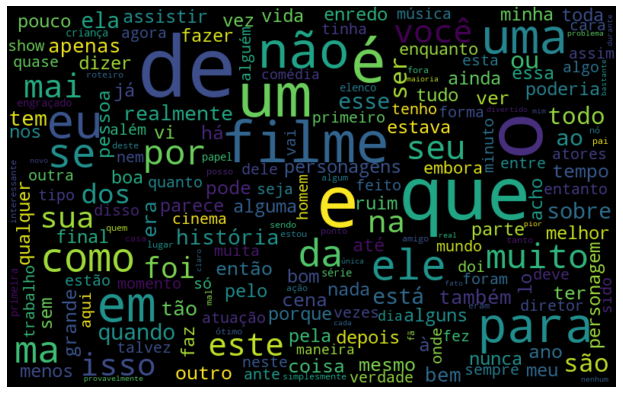

In [24]:
# Transformando a nuvem de palavras em uma imagem:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.imshow(nuvem_palavras, interpolation = 'bilinear') # parâmetro interpolation: trabalha para deixar as imagens mais nítidas
plt.axis('off')
plt.show()

#### Note que as palavras mostradas não agregam muito para uma análise, isto é, não ajudam na classificação de um sentimento.

### Criando 2 word clouds: uma para sentimentos positivos e outra para sentimentos negativos.

In [25]:
# Separando os sentimentos positivos e negativos:

resenha.query('sentiment == "pos"')

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [26]:
# Definindo funções para criação de nuvem de palavras com sentimentos negativos:

def nuvem_negativa(texto, coluna_texto):
    
    texto_negativo = texto.query('sentiment == "neg"')
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])
    
    nuvem_palavras = WordCloud(width = 800, height = 500,
                               max_font_size = 110,
                               collocations = False).generate(todas_palavras)
    
    plt.figure(figsize = (10,7))
    plt.imshow(nuvem_palavras, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

In [27]:
# Definindo funções para criação de nuvem de palavras com sentimentos positivos:

def nuvem_positiva(texto, coluna_texto):
    
    texto_positivo = texto.query('sentiment == "pos"')
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])
    
    nuvem_palavras = WordCloud(width = 800, height = 500,
                               max_font_size = 110,
                               collocations = False).generate(todas_palavras)
    
    plt.figure(figsize = (10,7))
    plt.imshow(nuvem_palavras, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

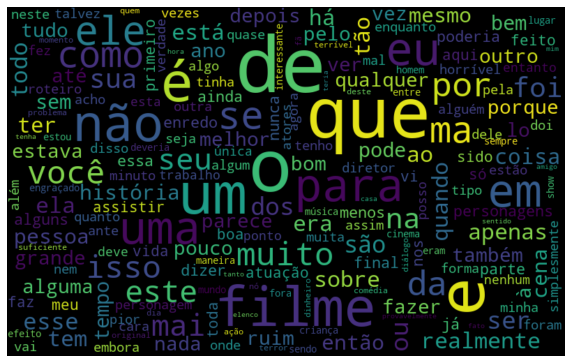

In [29]:
nuvem_negativa(resenha, 'text_pt')

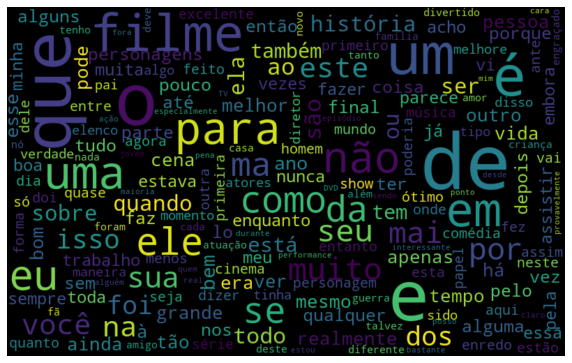

In [30]:
nuvem_positiva(resenha, 'text_pt')

In [32]:
import nltk

#nltk.download('all')

In [36]:
# Tokenizando frases: Separar cada palavra como um elemento

from nltk import tokenize

frase_teste = 'Bem-vindo ao mundo do LNP'

token_por_espaco = tokenize.WhitespaceTokenizer() # Separará sempre que houver um espaço.
token_frase = token_por_espaco.tokenize(frase_teste)
print(token_frase_teste)

['Bem-vindo', 'ao', 'mundo', 'do', 'LNP']


In [39]:
# Tokenizando todas as frases:

token_frases = token_por_espaco.tokenize(todas_palavras)


In [43]:
# Calculando a frequência das palavras:

frequencias = nltk.FreqDist(token_frases) #precisamos passar como parâmetro uma lista na qual cada palavra será um elemento da mesma.
frequencias


FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [44]:
# Criando um DataFrame para melhor visualização:

df_frequencia = pd.DataFrame({'Palavra': list(frequencias.keys()),
                              'Frequencia': list(frequencias.values())})

In [46]:
df_frequencia.head()

,Palavra,Frequencia
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741


In [54]:
# Mostrando as palavras que mais aparecem:

df_frequencia = df_frequencia.nlargest(columns = 'Frequencia', n = 10)
df_frequencia

,Palavra,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


### Note, novamente, que as palavras mais frequentes são palavras que não dão muitas informações sobre o sentimento provocado pelo filme.

In [48]:
# Visualizando as frequencias das palavras em um gráfico:

import seaborn as sns

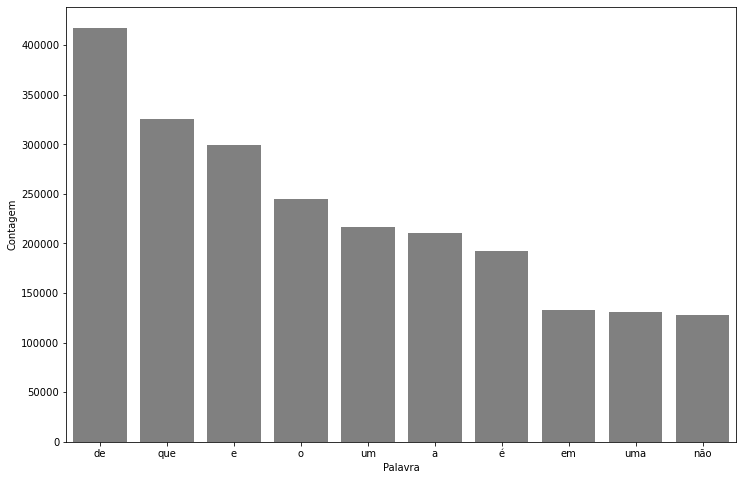

In [55]:
plt.figure(figsize = (12,8))
ax = sns.barplot(data = df_frequencia, x = 'Palavra', y = 'Frequencia', color = 'gray')
ax.set(ylabel = 'Contagem')
plt.show()

In [56]:
# Criando uma função para fazer a tokenização e mostrar o grafico das palavras mais frequentes:

def token_grafico(texto, coluna_texto, qtd_palavras_grafico):
    
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frases = token_por_espaco.tokenize(todas_palavras)
    
    frequencia = nltk.FreqDist(token_frases)
    df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                                  'Frequencia': list(frequencia.values())})
    
    df_frequencia = df_frequencia.nlargest(columns = 'Frequencia', n = qtd_palavras_grafico)
    
    plt.figure(figsize = (12,8))
    ax = sns.barplot(data = df_frequencia, x = 'Palavra', y = 'Frequencia', color = 'gray')
    ax.set(ylabel = 'Contagem')
    plt.show()

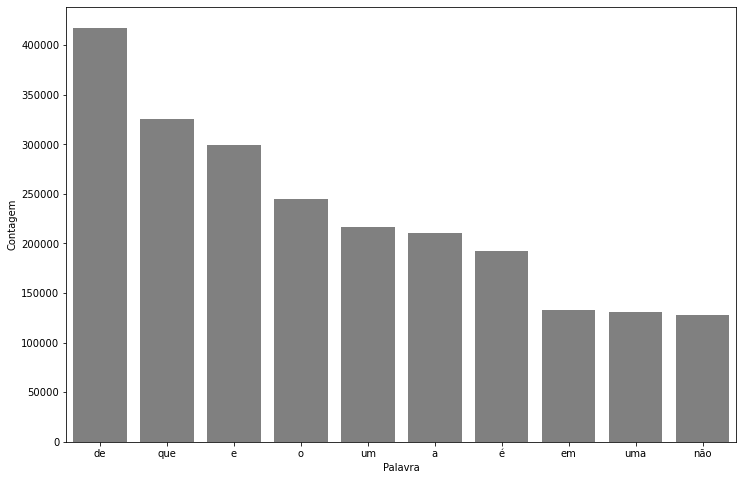

In [58]:
token_grafico(resenha,'text_pt', 10)

### Stop Words:

In [59]:
stop_words = nltk.corpus.stopwords.words('portuguese')

In [60]:
print(stop_words)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [65]:
# Remoção dos stop words do texto:

frase_processada = []


# Para cada opinião, tokenizaremos as frases e sera feita a remoção das stop words:
for opiniao in resenha['text_pt']:
    nova_frase = []
    palavras_texto = token_por_espaco.tokenize(opiniao)
        
    # Agora percorreremos palavra por palavra:
    for palavra in palavras_texto:
        if palavra not in stop_words:
            nova_frase.append(palavra)
                
# Nesse ponto, já temos cada opinião composta apenas por palavras relevantes.
# Queremos, agora, que esse texto seja apenas 1 string e não uma lista na qual cada item da mesma seja composto por pedaços.
    
    frase_processada.append(' '.join(nova_frase))

In [66]:
# Criando uma coluna no dataframe:

resenha['tratamento1'] = frase_processada

In [67]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [68]:
# Utilizando a função para verificar se houve aumento de acurácia:

classificar_texto(resenha, 'tratamento1', 'classificacao')

0.6607359482410028

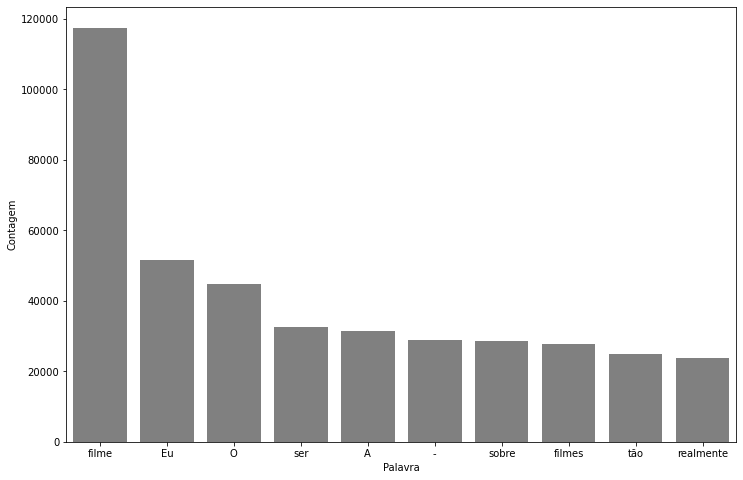

In [69]:
token_grafico(resenha, 'tratamento1', 10)

#### Vemos, com o gráfico acima, que ainda podemos melhorar e incluir mais stop words.